In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

## Load the training/validation datasets


In [348]:
train_val_data = pd.read_csv("/content/churn-bigml-80.csv")
train_val_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Load the test datasets

In [349]:
test_data = pd.read_csv("/content/churn-bigml-20.csv")
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## Data investigating

In [350]:
train_val_data.shape

(2666, 20)

In [351]:
test_data.shape

(667, 20)

## Check if testing data is as same as the training data

In [352]:
if (train_val_data.columns == test_data.columns).all():
    print("Same Data in Both files")

Same Data in Both files


## Replace all True/False or Yes/No Data with 1/0 to change it into numerical data for further analysis in trainig and testing datasets

In [353]:
train_val_data['International plan'] = train_val_data['International plan'].replace({'Yes': 1, 'No': 0})
train_val_data['Voice mail plan'] = train_val_data['Voice mail plan'].replace({'Yes': 1, 'No': 0})
train_val_data['Churn'] = train_val_data['Churn'].replace({True: 1, False: 0})

<ipython-input-353-39a8de4bf7d5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_val_data['International plan'] = train_val_data['International plan'].replace({'Yes': 1, 'No': 0})
<ipython-input-353-39a8de4bf7d5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_val_data['Voice mail plan'] = train_val_data['Voice mail plan'].replace({'Yes': 1, 'No': 0})
<ipython-input-353-39a8de4bf7d5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [354]:
train_val_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [355]:
test_data['International plan'] = test_data['International plan'].replace({'Yes': 1, 'No': 0})
test_data['Voice mail plan'] = test_data['Voice mail plan'].replace({'Yes': 1, 'No': 0})
test_data['Churn'] = test_data['Churn'].replace({True: 1, False: 0})

<ipython-input-355-f7a6d1a62b62>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['International plan'] = test_data['International plan'].replace({'Yes': 1, 'No': 0})
<ipython-input-355-f7a6d1a62b62>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Voice mail plan'] = test_data['Voice mail plan'].replace({'Yes': 1, 'No': 0})
<ipython-input-355-f7a6d1a62b62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `res

In [356]:
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


## Get all features in the file

In [357]:
train_val_data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [358]:
train_val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

#check if state data is helpful or not and see it can change anything or not if it is related to churn

In [359]:
train_val_data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [360]:
train_val_data['State'].nunique()

51

## Get all Customer where the churn value is True in each state

In [361]:
churn_state_data = train_val_data.groupby('State')['Churn'].apply(lambda x: (x == 1).sum())
churn_state_data.sort_values(ascending=False, inplace=True)
churn_state_data

,Churn
State,
TX,16
MD,14
NJ,14
MI,13
MN,13
NV,13
NY,12
MS,11
SC,11


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'TX'),
  Text(1, 0, 'MD'),
  Text(2, 0, 'NJ'),
  Text(3, 0, 'MI'),
  Text(4, 0, 'MN'),
  Text(5, 0, 'NV'),
  Text(6, 0, 'NY'),
  Text(7, 0, 'MS'),
  Text(8, 0, 'SC'),
  Text(9, 0, 'CT'),
  Text(10, 0, 'AR'),
  Text(11, 0, 'ME'),
  Text(12, 0, 'OH'),
  Text(13, 0, 'MT'),
  Text(14, 0, 'KS'),
  Text(15, 0, 'WA'),
  Text(16, 0, 'NH'),
  Text(17, 0, 'NC'),
  Text(18, 0, 'PA'),
  Text(19, 0, 'UT'),
  Text(20, 0, 'WY'),
  Text(21, 0, 'MA'),
  Text(22, 0, 'GA'),
  Text(23, 0, 'DE'),
  Text(24, 0, 'WV'),
  Text(25, 0, 'CO'),
  Text(26, 0, 'OR'),
  Text(27, 0, 'FL'),
  Text(28, 0, 'OK'),
  Text(29, 0, 'AL'),
  Text(30, 0, 'SD'),
  Text(31, 0, 'KY'),
  Text(32, 0, 'VT'),
  Text(33, 0, 'IN'),

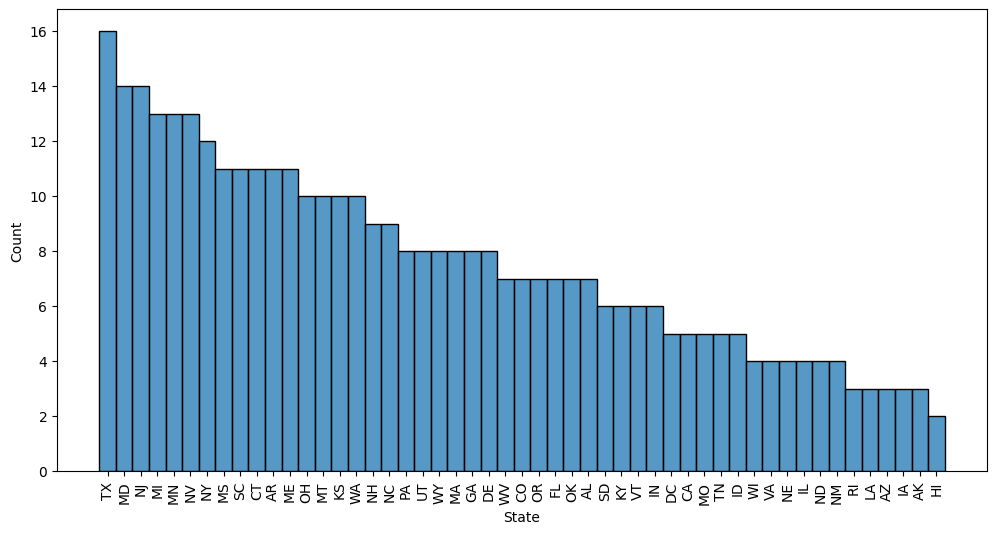

In [362]:
plt.figure(figsize=(12, 6))
sns.histplot(x=churn_state_data.index,
             weights=churn_state_data.values,
             discrete=True)
plt.xticks(rotation=90)

## Encode the state as numerical value to help in getting the ouput correctly

In [363]:

label_encoder = LabelEncoder()
train_val_data['State_encoded'] = label_encoder.fit_transform(train_val_data['State'])
print(train_val_data[['State', 'State_encoded']].head())

  State  State_encoded
0    KS             16
1    OH             35
2    NJ             31
3    OH             35
4    OK             36


In [364]:
correlation = train_val_data['State_encoded'].corr(train_val_data['Churn'])
print(f"Correlation between 'State' and Churn variable: {correlation}")

Correlation between 'State' and Churn variable: 0.0004298110237875995


### we will use tree based model like random forest it can get useful pattern from it so we will stay it despite small value of it.

In [365]:
train_val_data.drop(['State'], axis=1, inplace=True)
train_val_data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,16
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,35
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,31
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,35
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,36


In [366]:
label_encoder = LabelEncoder()
test_data['State_encoded'] = label_encoder.fit_transform(test_data['State'])
test_data.drop(['State'], axis=1, inplace=True)
test_data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,18
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,15
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,34
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,40
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,11


In [367]:
train_val_data['Area code'].unique()

array([415, 408, 510])

In [368]:
Churn_AreaCode_data = train_val_data.groupby('Area code')['Churn'].apply(lambda x: (x == 1).sum())
Churn_AreaCode_data.sort_values(ascending=False, inplace=True)
Churn_AreaCode_data

,Churn
Area code,
415,195
510,99
408,94


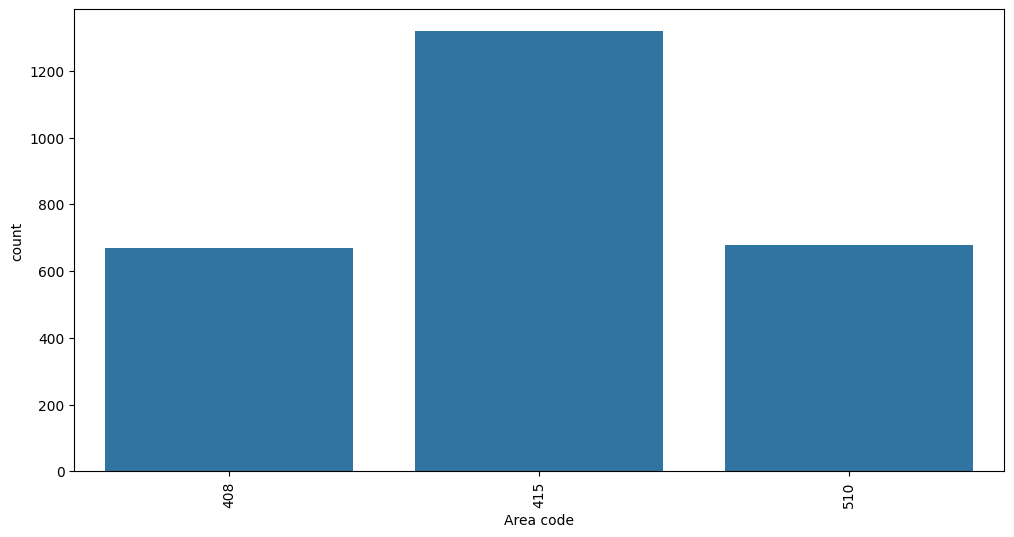

In [369]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Area code', data=train_val_data)
plt.xticks(rotation=90)
plt.show()

In [370]:
label_encoder = LabelEncoder()
train_val_data['Area code_Encoded'] = label_encoder.fit_transform(train_val_data['Area code'])
train_val_data.drop(['Area code'], axis=1, inplace=True)
train_val_data.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded,Area code_Encoded
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,16,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,35,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,31,1
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,35,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,36,1


In [371]:
# Assuming 'y' is your target variable
correlation = train_val_data['Area code_Encoded'].corr(train_val_data['Churn'])
print(f"Correlation between 'Area code_Encoded' and Churn variable: {correlation}")

Correlation between 'Area code_Encoded' and Churn variable: 0.005302370977215539


### we will stay the column as we mention before

In [372]:
label_encoder = LabelEncoder()
test_data['Area code_Encoded'] = label_encoder.fit_transform(test_data['Area code'])
test_data.drop(['Area code'], axis=1, inplace=True)
test_data.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded,Area code_Encoded
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,18,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,15,1
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,34,1
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,40,1
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,11,2


## check Missing vlaues

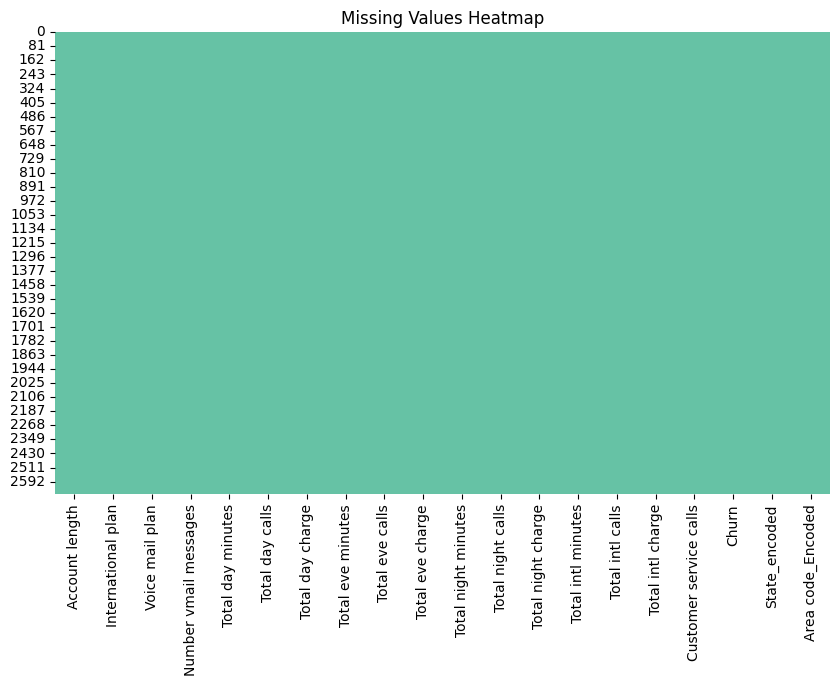

In [373]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_val_data.isna(), cbar=False, cmap='Set2')
plt.title('Missing Values Heatmap')
plt.show()

### No missing values Found in Traning Dataset

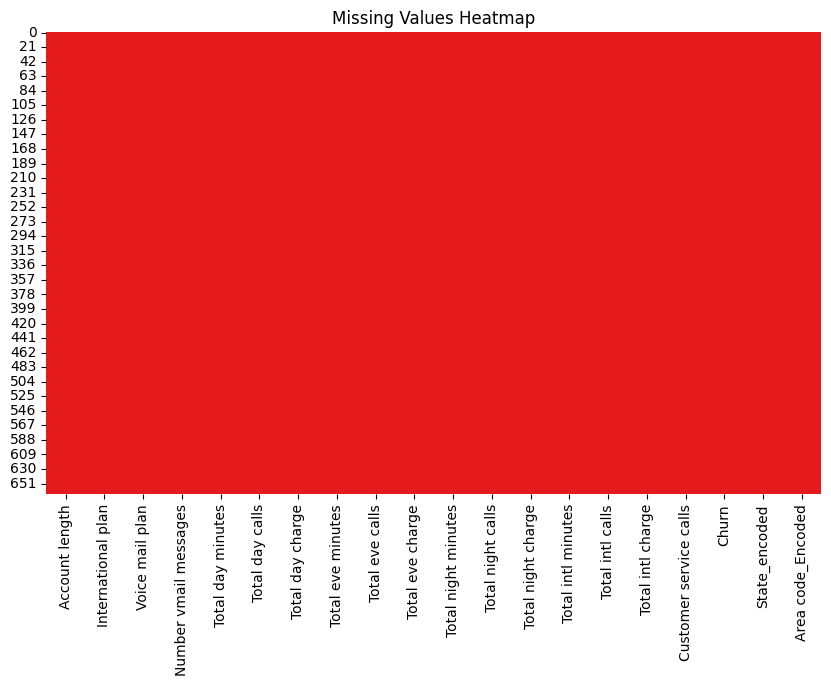

In [374]:
plt.figure(figsize=(10, 6))
sns.heatmap(test_data.isna(), cbar=False, cmap='Set1')
plt.title('Missing Values Heatmap')
plt.show()

### No missing values Found in Testing Dataset

##Checking For Duplicates

In [375]:
train_val_data.duplicated().sum()

0

In [376]:
test_data.duplicated().sum()

0

## Correlation in Training Dataset columns with Churn

In [377]:
correlation_matrix = train_val_data.corr()
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
churn_corr

,Churn
Churn,1.000000
International plan,0.277489
Customer service calls,0.202590
Total day charge,0.195689
Total day minutes,0.195688
Total intl charge,0.086216
Total intl minutes,0.086204
Total eve minutes,0.072906
Total eve charge,0.072893
Total night minutes,0.033639


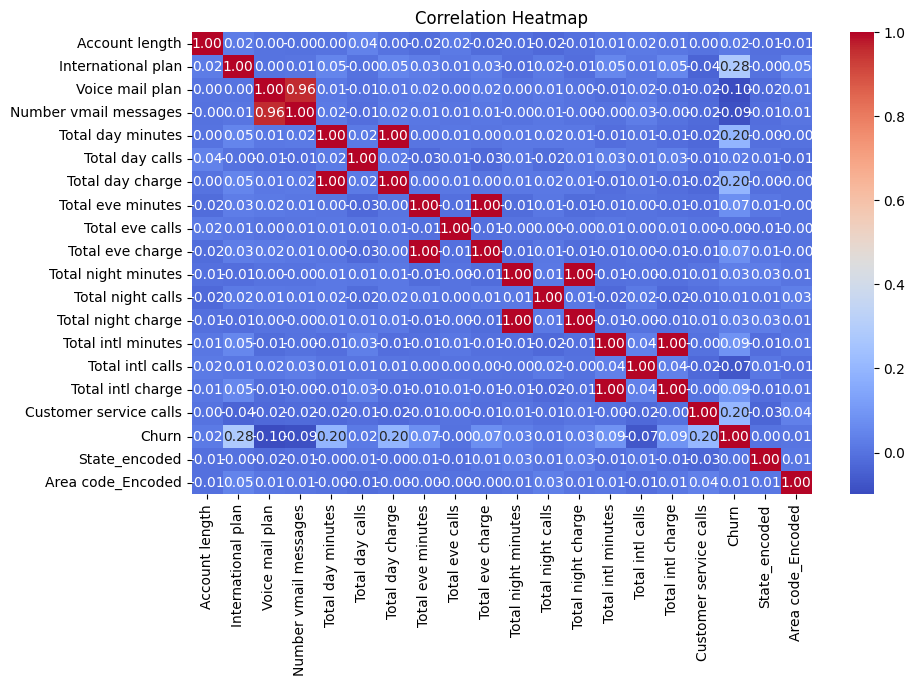

In [378]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 2000x1500 with 0 Axes>

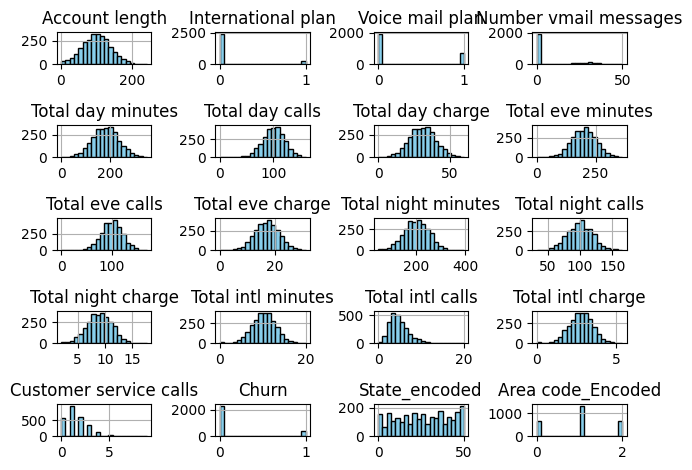

In [379]:
plt.figure(figsize=(20, 15))
train_val_data.hist(bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [380]:
train_val_data.skew()

,0
Account length,0.079023
International plan,2.644737
Voice mail plan,1.008690
Number vmail messages,1.271774
Total day minutes,-0.053106
Total day calls,-0.128267
Total day charge,-0.053087
Total eve minutes,-0.012665
Total eve calls,-0.065209
Total eve charge,-0.012629


In [381]:
numeric_features = train_val_data.select_dtypes(include=np.number)
numeric_features = numeric_features.columns.tolist()
len(numeric_features)

20

### we see that all features are numeric

## Get Outliers and deal with it

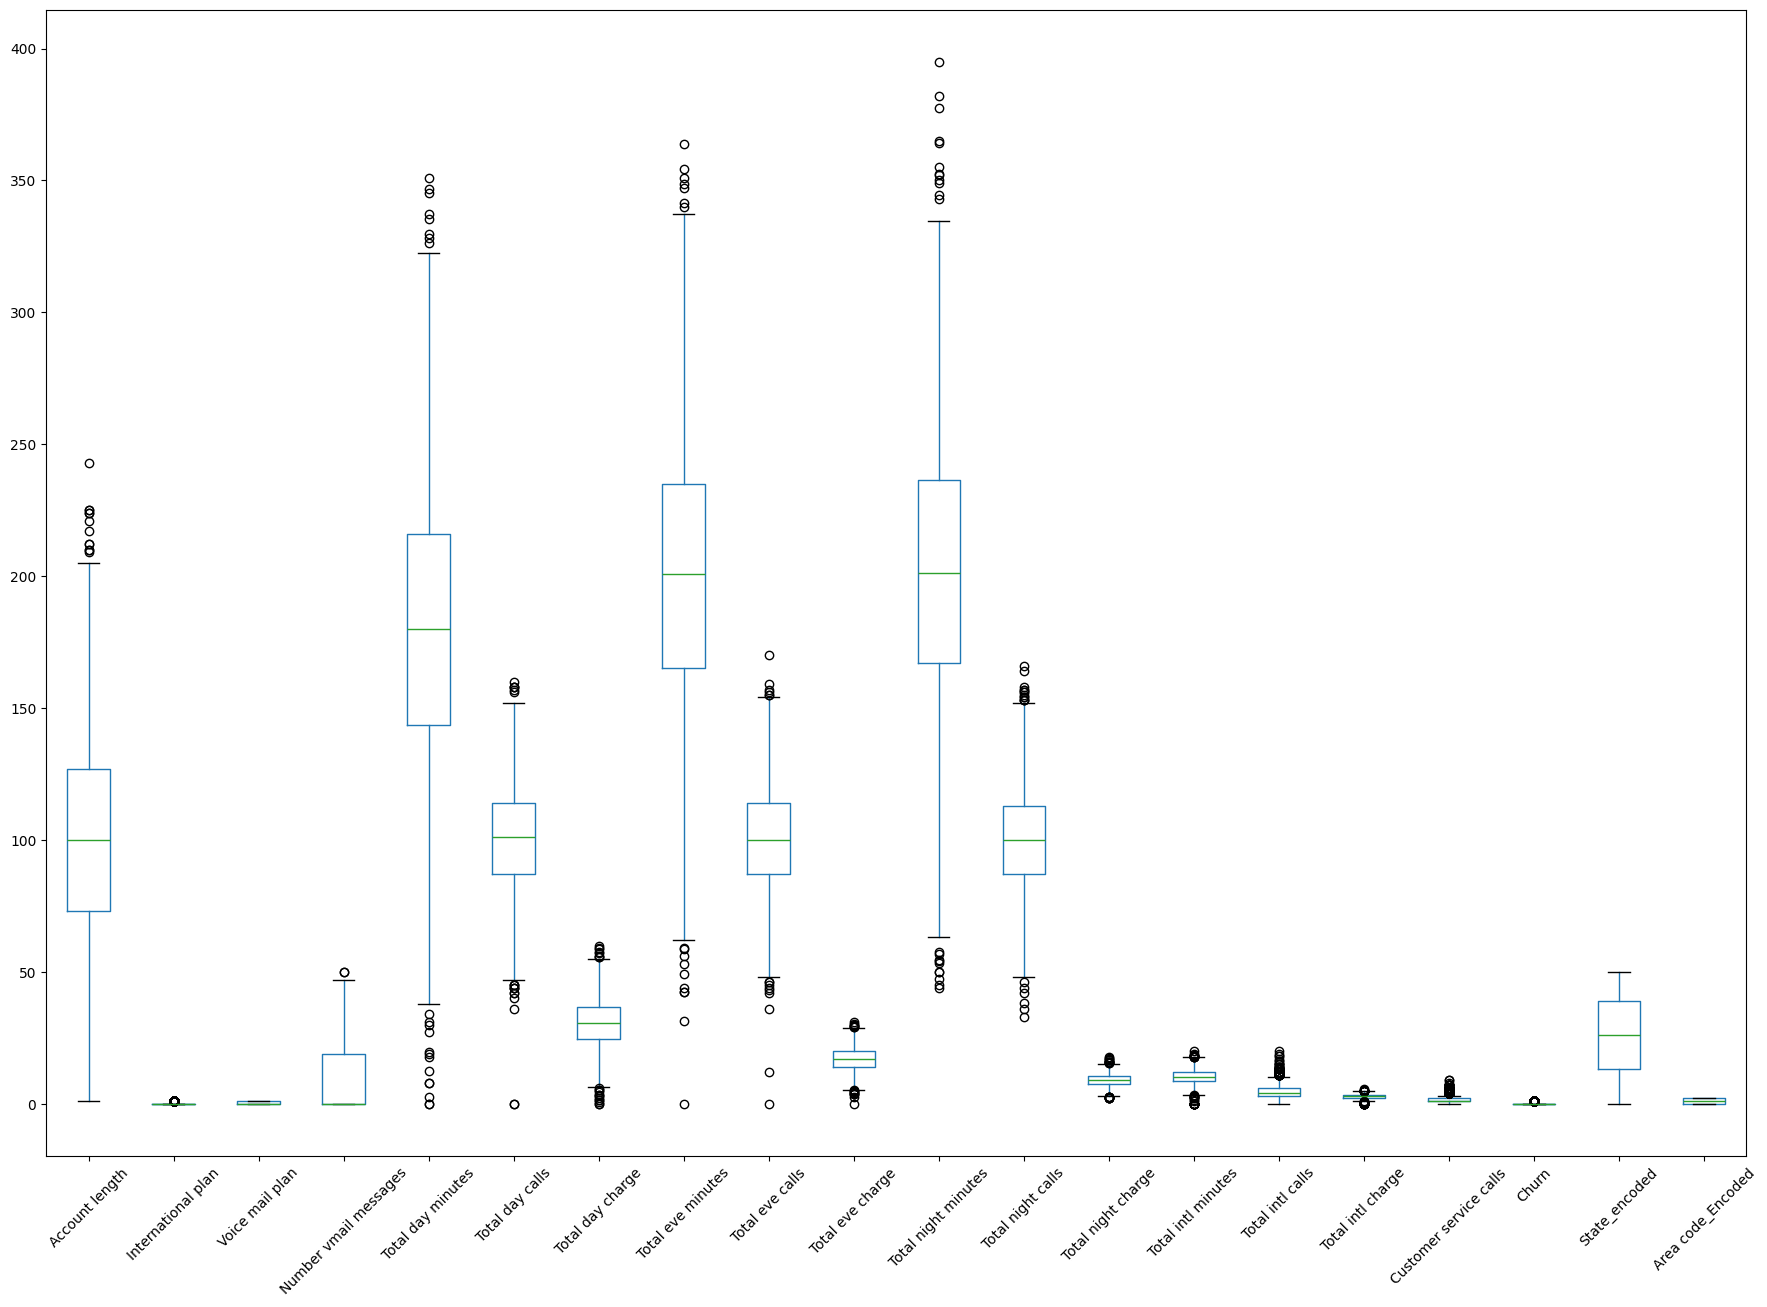

In [382]:
plt.figure(figsize=(18
                    , 12))
train_val_data.boxplot(column=numeric_features, grid=False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


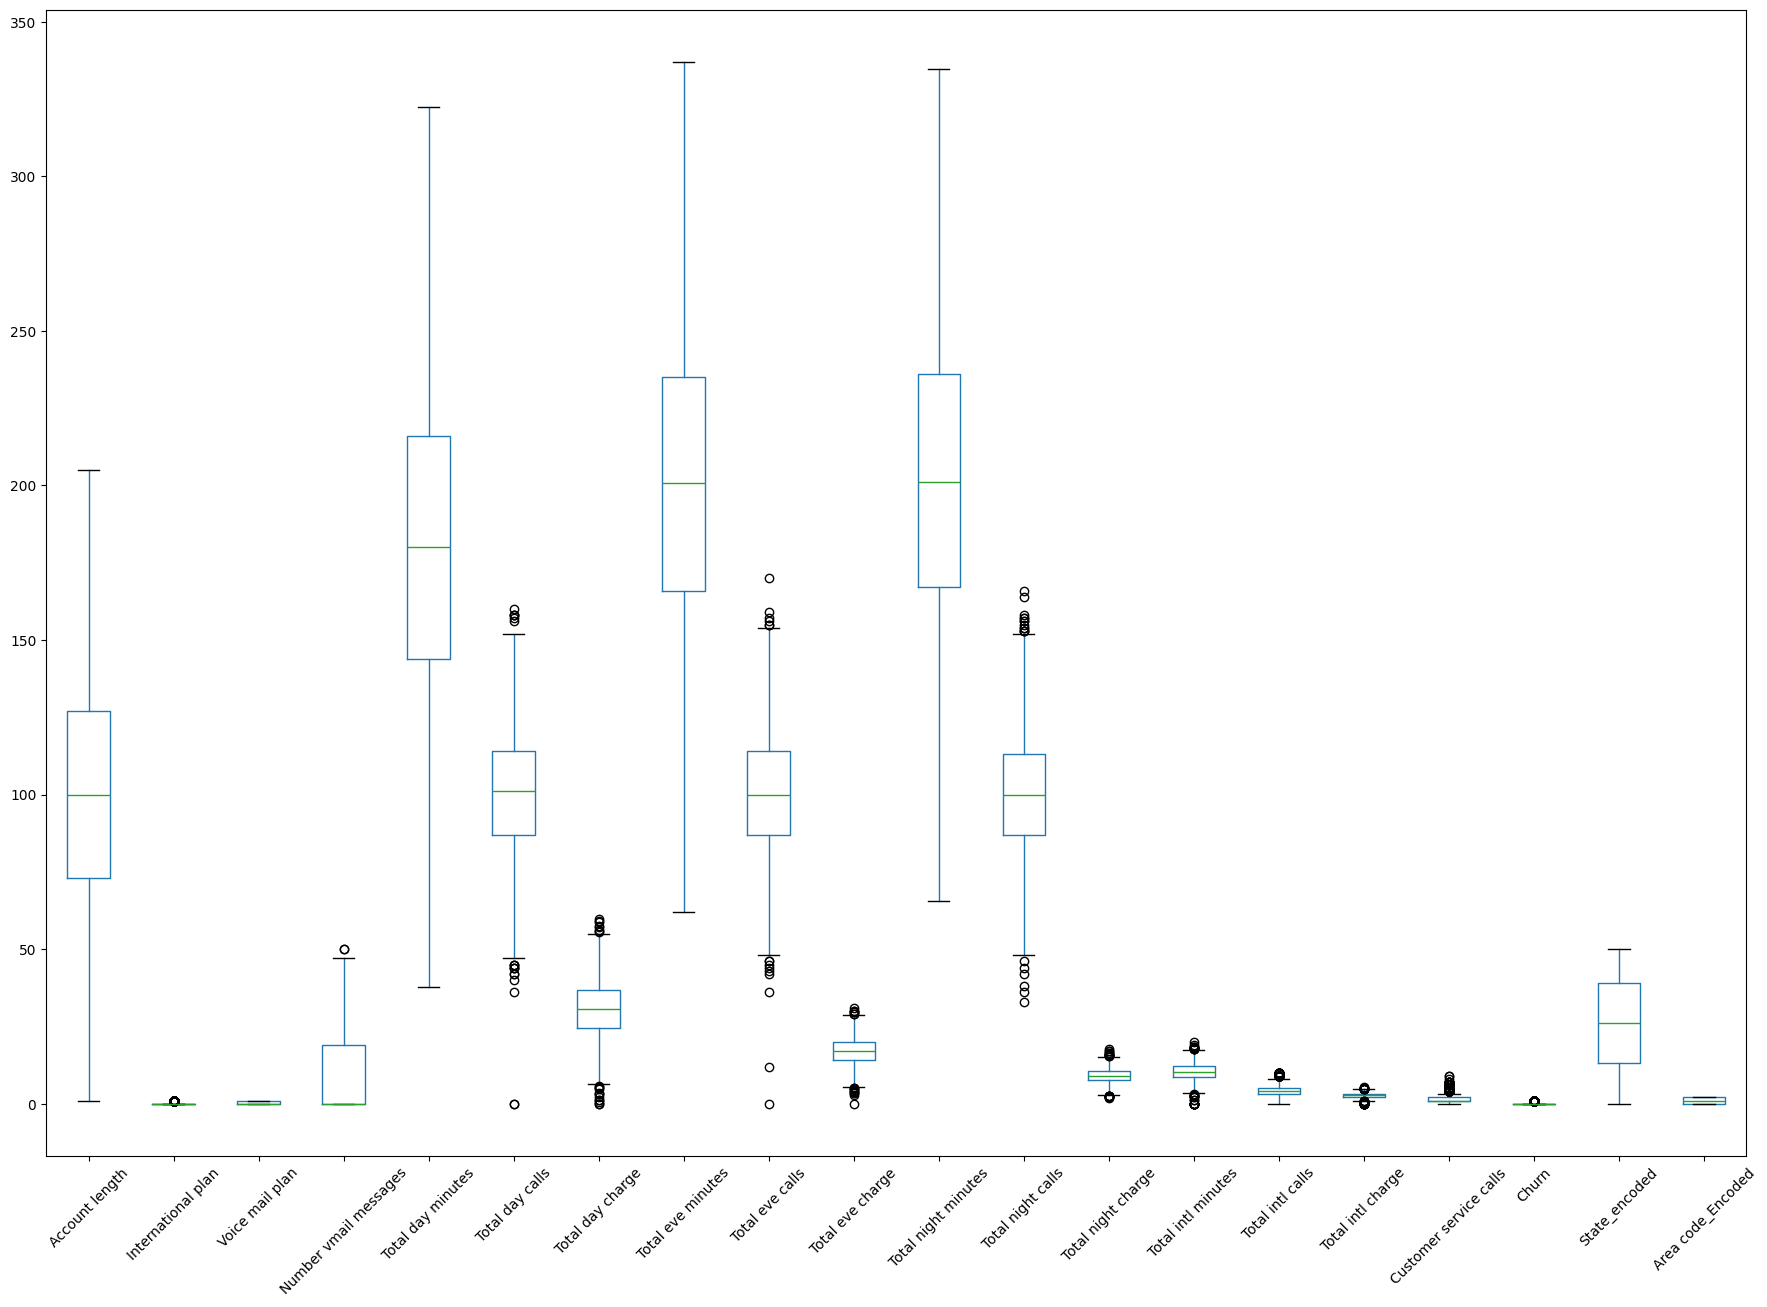

In [446]:
numeric_features_outlier = ['Total eve minutes','Total night minutes','Total day minutes','Account length']

Q1 = train_val_data[numeric_features_outlier].quantile(0.25)
Q3 = train_val_data[numeric_features_outlier].quantile(0.75)
IQR = Q3 - Q1
train_val_data[numeric_features_outlier] = train_val_data[numeric_features_outlier][(train_val_data[numeric_features_outlier] >= (Q1 - 1.5 * IQR)) & (train_val_data[numeric_features_outlier] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(18
                    , 12))
train_val_data.boxplot(column=numeric_features, grid=False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Check if the data is balanced or not

In [467]:
class_counts = train_val_data['Churn'].value_counts()
class_counts

,count
Churn,
0,2278
1,388


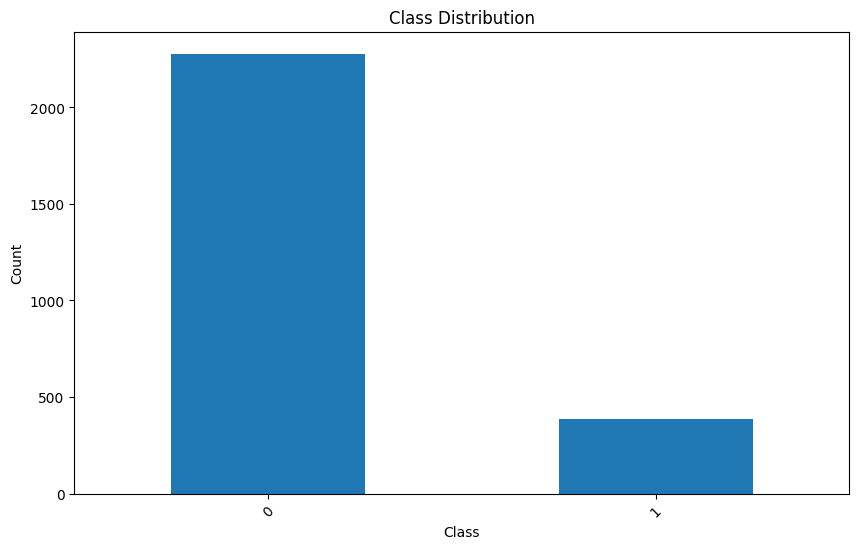

In [448]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Classes are not distributed equally so we will use oversampling technique such as SMOTE to treat that by oversampling the minority class

### 1. Define features and target variable

In [449]:
X_train_val = train_val_data.drop('Churn', axis=1)
y_train_val = train_val_data['Churn']

### 2. Split the train_val_data into train and validation sets


In [450]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)  # 80% train, 20% val

### 3. Standardization (Unnecessary with RandomForest or tree based model)

In [451]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#### 3.2 Scale the test features using the same scaler

In [452]:
X_test = test_data.drop('Churn', axis=1)
X_test = scaler.transform(X_test)

### 4.Define the target variable for test data which is Churn

In [453]:
y_test = test_data['Churn']

### 5. Apply SMOTE for balancing Data

In [454]:
# Impute missing values using SimpleImputer for new data from SMOTE technique
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape

(3886, 19)

#### check the churn after sampling

In [455]:
y_train_resampled.value_counts()

,count
Churn,
0,1943
1,1943


### 6. Apply Random Forest Model

In [456]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [457]:
y_val_pred_proba = model.predict_proba(X_val)[:, 1]
optimal_threshold = 0.4  # Start with a threshold lower than 0.5 to increase recall
y_val_pred = (y_val_pred_proba >= optimal_threshold).astype(int)


### 7. Evaluate on the validation set


In [458]:
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.945


#### 7.2 Validation Classification Report

In [459]:
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.938375,1.000000,0.968208,335.000
1,1.000000,0.661538,0.796296,65.000
accuracy,0.945000,0.945000,0.945000,0.945
macro avg,0.969188,0.830769,0.882252,400.000
weighted avg,0.948389,0.945000,0.940272,400.000


#### 7.3 Validation Confusion Matrix

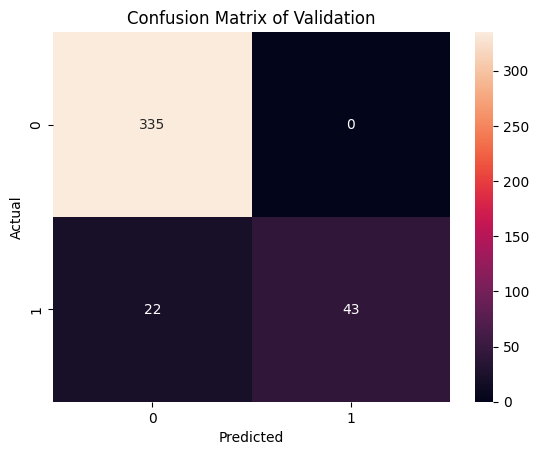

In [460]:
CM = confusion_matrix(y_val, y_val_pred)
sns.heatmap(CM, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Validation')
plt.show()

### 7.4 Precision-Recall Curve (optional visualization)

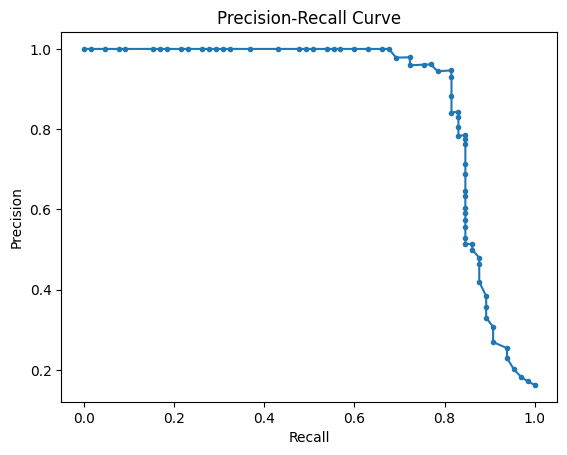

In [461]:
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### 8. Evaluate on the test set

In [462]:
y_val_pred_proba = model.predict_proba(X_val)[:, 1]
optimal_threshold = 0.4  # Start with a threshold lower than 0.5 to increase recall
y_test_pred = (y_val_pred_proba >= optimal_threshold).astype(int)

In [463]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.9565217391304348


#### 8.2 Test Classification Report

In [464]:
print("\nTest Classification Report:")
#print(classification_report(y_test, y_test_pred))
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).T


Test Classification Report:


,precision,recall,f1-score,support
0,0.954774,0.996503,0.975192,572.000000
1,0.971429,0.715789,0.824242,95.000000
accuracy,0.956522,0.956522,0.956522,0.956522
macro avg,0.963101,0.856146,0.899717,667.000000
weighted avg,0.957146,0.956522,0.953693,667.000000


#### 8.3 Test Confusion Matrix

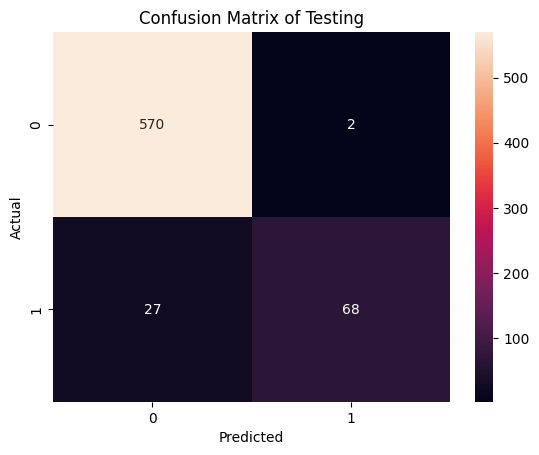

In [465]:
CM = confusion_matrix(y_test, y_test_pred)
sns.heatmap(CM, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Testing')
plt.show()

### 8.4 Test Precision-Recall Curve

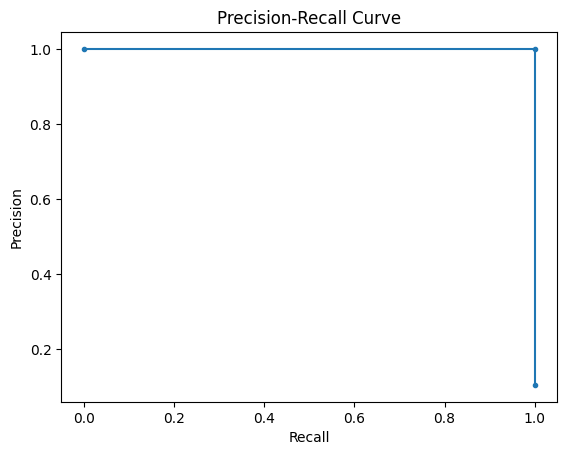

In [466]:
precision, recall, thresholds = precision_recall_curve(y_test_pred, y_test_pred)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [469]:
class_counts_test = test_data['Churn'].value_counts()
class_counts_test

,count
Churn,
0,572
1,95


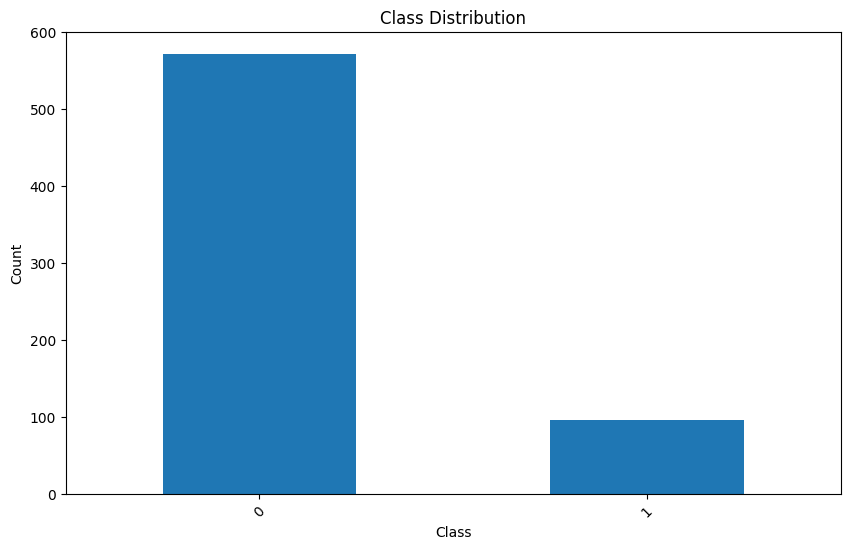

In [470]:
plt.figure(figsize=(10, 6))
class_counts_test.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()